In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import os
import pandas as pd

5


c:\Users\larsr\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:1338: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "
C:\Users\larsr\AppData\Local\Temp\ipykernel_25016\2801228994.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


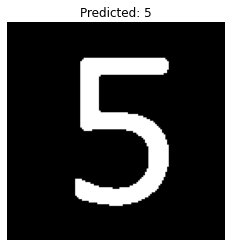

3


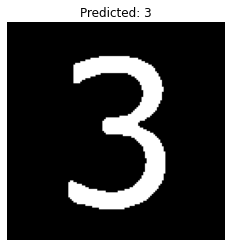

7


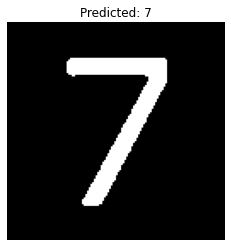

6


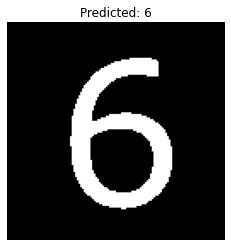

1


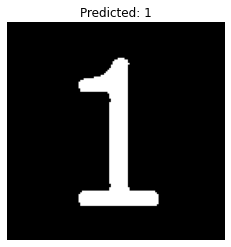

9


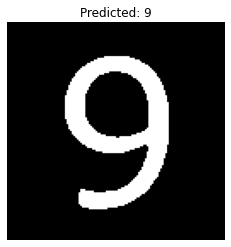

5


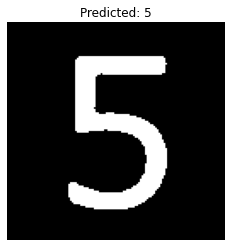

9


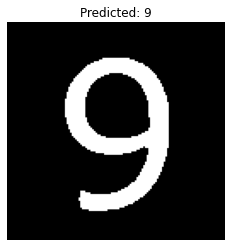

8


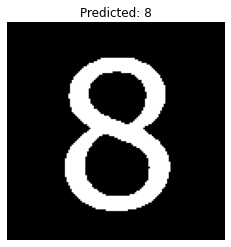

6


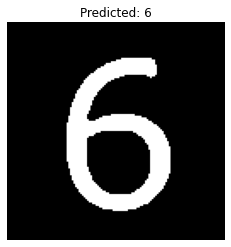

8


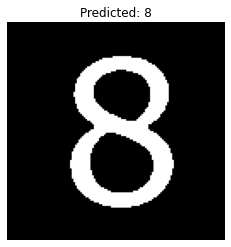

6


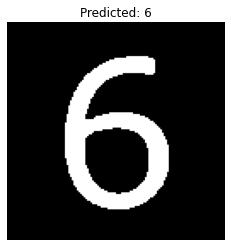

3


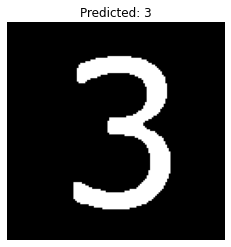

4


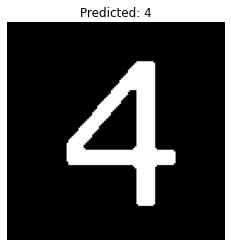

8


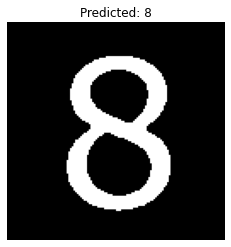

3


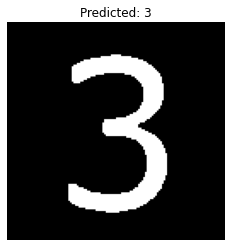

1


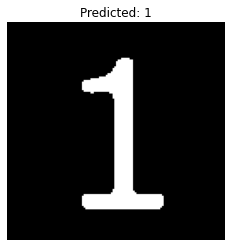

7


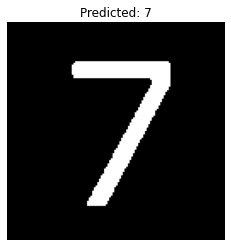

2


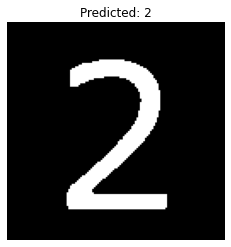

6


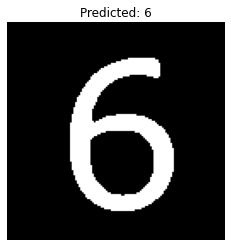

6


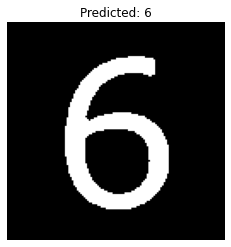

2


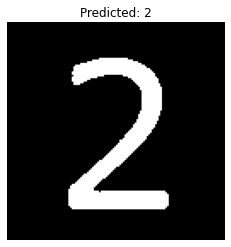

8


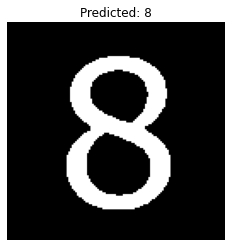

4


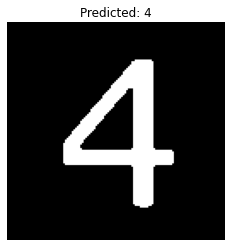

1


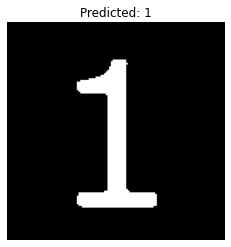

9


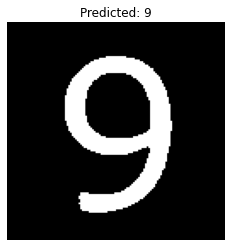

5


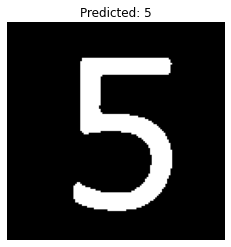

8


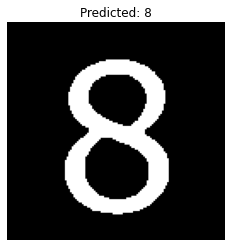

7


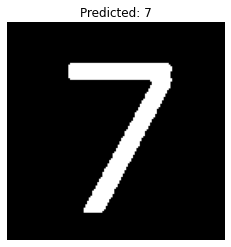

9


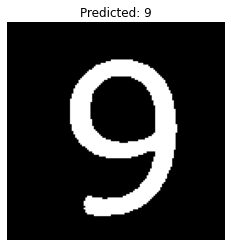

RuntimeError: Given groups=1, weight of size [10, 1, 5, 5], expected input[1, 4, 28, 42] to have 1 channels, but got 4 channels instead

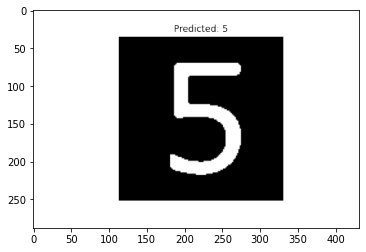

In [33]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

loader = transforms.Compose([transforms.Resize(28), transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Disable grad
with torch.no_grad():

    path = 'puzzles/1'
    files = [f for f in os.listdir(path) if 'digit_' in f]

    # Loading the saved model
    model = Net()
    model.load_state_dict(torch.load("results/model.pth"))
    model.eval()

    predictions = []

    for file in files:
        image = Image.open(os.path.join(path, file))
        plt.imshow(image, cmap='gray')
        input = loader(image)
        prediction = model(input)
        predicted_class = int(np.argmax(prediction))
        print(predicted_class)
        predictions.append([file, predicted_class])
        plt.imshow(image, cmap='gray')
        plt.title("Predicted: {}".format(predicted_class))
        plt.axis('off')
        plt.savefig(os.path.join(path, "predicted.{}".format(file)))
        plt.show()

    df = pd.DataFrame(predictions, columns=["Cell", "Prediction"])
    print(df)
    df.to_csv(os.path.join(path, "board.csv"))
